# **Task 1: Exploratory Data Analysis (EDA) and Business Insights**

In [95]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime

In [96]:
#loading the dataset
Customers_df= pd.read_csv("C:/Users/User/Desktop/data science/Zeotap Assignment/data/Customers.csv")
Products_df=pd.read_csv("C:/Users/User/Desktop/data science/Zeotap Assignment/data/Products.csv")
Transaction_df=pd.read_csv("C:/Users/User/Desktop/data science/Zeotap Assignment/data/Transactions.csv")

## **Data Cleaning**

In [97]:
Customers_df.head(2)

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13


In [98]:
Products_df.head(2)

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.3
1,P002,ActiveWear Smartwatch,Electronics,346.3


In [99]:
Transaction_df.head(2)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68


In [100]:
Customers_df.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [101]:
Products_df.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [102]:
Transaction_df.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [103]:
Customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [104]:
Customers_df['SignupDate']=pd.to_datetime(Customers_df['SignupDate'])

In [105]:
Transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [106]:
Transaction_df['TransactionDate']=pd.to_datetime(Transaction_df['TransactionDate'])

In [107]:
Products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [108]:
Transaction_df.head(1)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68


## **Dataset Overview**

In [109]:
Customers_df['Region'].value_counts()

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

In [110]:
Products_df['Category'].value_counts()

Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64

In [111]:
Transaction_df.describe()

,TransactionDate,Quantity,TotalValue,Price
count,1000,1000.000000,1000.000000,1000.00000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000
std,NaN,1.117981,493.144478,140.73639


## **EDA**

### *Customer Analysis*

C:\Users\User\AppData\Local\Temp\ipykernel_13064\3381841781.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region.index, y=region.values, palette='plasma')


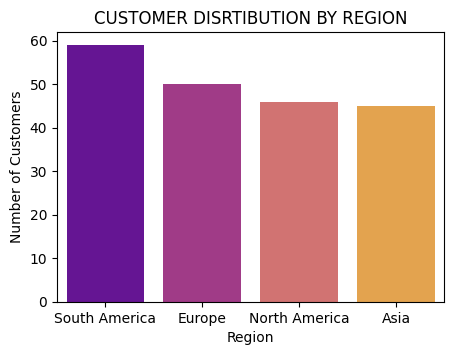

In [112]:
# customer distribution by region 
region= Customers_df['Region'].value_counts()
plt.figure(figsize=(5,3.5))

sns.barplot(x=region.index, y=region.values, palette='plasma')
plt.title('CUSTOMER DISRTIBUTION BY REGION')
plt.xlabel('Region')
plt.ylabel('Number of Customers')

plt.show()

In [113]:
# South America has the largest customer data, contributing significantly to the company's growth.

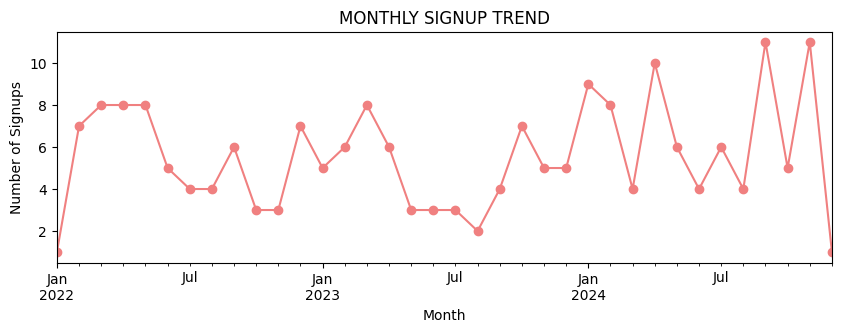

In [ ]:
# signup trends over time
signup_trends= Customers_df['SignupDate'].dt.to_period('M').value_counts().sort_index()

plt.figure(figsize=(10,3))
signup_trends.plot(kind='line', marker='o', color='lightcoral')

plt.title('MONTHLY SIGNUP TREND')
plt.xlabel('Month')
plt.ylabel('Number of Signups')

plt.show()

### *Product Analysis*

C:\Users\User\AppData\Local\Temp\ipykernel_13064\3730761001.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=catergory_revenue.index, y=catergory_revenue.values, palette='plasma')


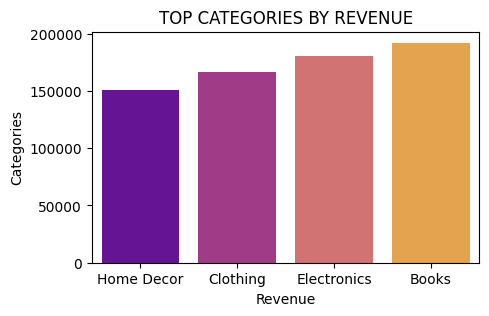

In [116]:
# Top categories by revenue 

merged_data= Transaction_df.merge(Products_df, on='ProductID')

catergory_revenue= merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=True)

plt.figure(figsize=(5,3))

sns.barplot(x=catergory_revenue.index, y=catergory_revenue.values, palette='plasma')
plt.title("TOP CATEGORIES BY REVENUE")
plt.xlabel('Revenue')
plt.ylabel('Categories')

plt.show()

In [117]:
# Books generates the most revenue, highlighting its importance for future marketting efforts.

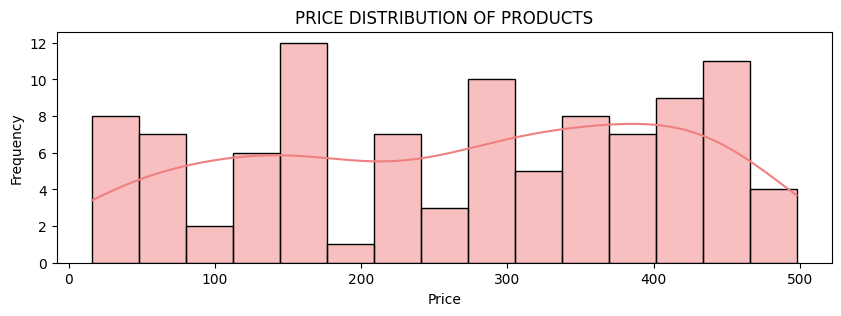

In [118]:
# Price distribution 

plt.figure(figsize=(10,3))

sns.histplot(Products_df['Price'], bins=15, kde=True, color= 'lightcoral')
plt.title("PRICE DISTRIBUTION OF PRODUCTS")
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()

### *Transaction Analysis* 

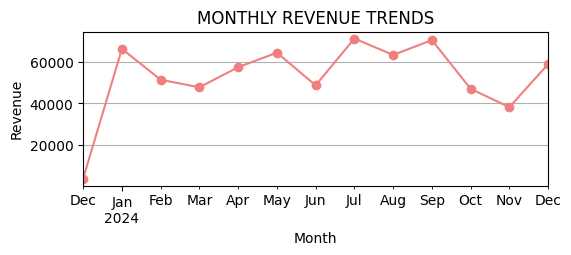

In [128]:
# Monthly revenue trends

Transaction_df['Month']=Transaction_df['TransactionDate'].dt.to_period('M')
monthly_revenue= Transaction_df.groupby('Month')['TotalValue'].sum()

plt.figure(figsize=(6,2))
monthly_revenue.plot(kind='line', marker='o', color='lightcoral')

plt.title('MONTHLY REVENUE TRENDS')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(axis='y')
plt.show()

In [121]:
# Repeat customers

repeat_cust= Transaction_df.groupby('CustomerID')['TransactionID'].count()
repeat_cust=repeat_cust[repeat_cust>1].count()

total_cust=Customers_df['CustomerID'].nunique()
repeat_rate=(repeat_cust / total_cust)*100

print(f"Repeat Customers : {repeat_rate:.2f}%")

Repeat Customers : 93.50%


### *Top-Selling Products* 

C:\Users\User\AppData\Local\Temp\ipykernel_13064\1554433945.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_prod.index, x=top_prod.values, palette='plasma')


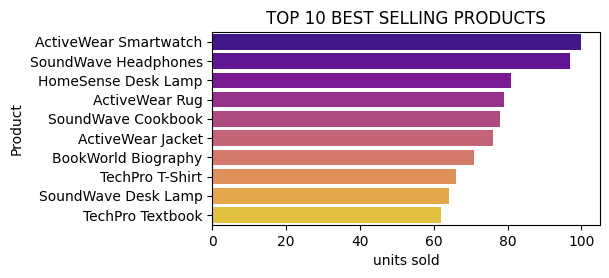

In [122]:
top_prod=merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(5,2.5))
sns.barplot(y=top_prod.index, x=top_prod.values, palette='plasma')

plt.title('TOP 10 BEST SELLING PRODUCTS')
plt.xlabel('units sold')
plt.ylabel('Product')

plt.show()

In [129]:
# ActiveWear Smartwatch and SoundWave Headphones are the top selling products, suggesting a strong customer base for these product lines.